#Dependency

In [ ]:
!pip install langchain
!pip install pypandoc
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 795.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.4 MB/s eta 0:00:00


#Imports


In [ ]:
import pandas as pd
import json
import pypandoc
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
from openai import OpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter

#Loading the Text Book


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SummerProgram/FULL_BIO_TEXTBOOK.docx'

# Preparing the DataSet

In [ ]:
df = pd.read_csv("hf://datasets/MBZUAI/ArabicMMLU/test.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Assuming your DataFrame is named 'df'
df_biology = df[df["Subject"] == "Biology"]
df_biology_filtered = df_biology[["Question", "Answer Key", "Option 1", "Option 2", "Option 3", "Option 4", "Option 5"]]
# Display the filtered DataFrame
df_biology_filtered

,Question,Answer Key,Option 1,Option 2,Option 3,Option 4,Option 5
9597,أي من الأت مٌثل الكرموسومات الأنثو ةٌ ؟,B,YX,XX,YY,XY,NaN
9598,تحت أي صنف نٌتم ح وٌان النمر ؟,A,الثدييات,الأسماك,الطيور,البرمائيات,NaN
9599,أي من الأمراض التال ةٌ تصنف من الأمراض المستوط...,B,الأيدز,الملاريا,الأيبولا,الحصبة,NaN
9600,"تزوج رجل مجهول فصيلة الدم , كانت فصيلة دم أمه ...",B,B,O,AB,A,NaN
9601,في أي أجزاء البلاستيدة الخضراء تحدث التفاعلات ...,A,الستروما ) الحشوة (,الثيلاكويد,الغشاء الداخلي,الغشاء الخارجي,NaN
...,...,...,...,...,...,...,...
11085,تسمى العلاقة بين الكائنات الحية التي يقوم من خ...,C,تنافس بين الأنواع المختلفة,السلوك الإقليمي .,الافتراس,تنافس بين النوع الواحد,NaN
11086,ما اسم الوعاء الدموي الذي يحمل الدم المؤكسج بع...,B,الصمام,الشرايين,الشعيرات,الأوردة,NaN
11087,ماذا تسمى مجموعة الأفراد التي لها القدرة على ا...,B,العائلة,النوع,المملكة,الجنس,NaN
11088,من العوامل التي يؤثر بها الإنسان على البيئة وع...,A,مياه الصرف الصحي,الاحتباس الحراري,إزالة الغابات,الصيد الجائر,NaN


In [ ]:
nan_count = df_biology_filtered["Option 5"].isna().sum()
nan_count

1411

In [ ]:
# Filter the DataFrame to find rows where "Option 5" is not NaN
row_with_option5 = df_biology_filtered[df_biology_filtered["Option 5"].notna()]

# Drop the row where "Option 5" is not NaN
df_biology_filtered_dropped = df_biology_filtered.drop(row_with_option5.index)

# Drop the "Option 5" column
df_biology_final = df_biology_filtered_dropped.drop(columns=["Option 5"])

# Display the resulting DataFrame
df_biology_final


,Question,Answer Key,Option 1,Option 2,Option 3,Option 4
9597,أي من الأت مٌثل الكرموسومات الأنثو ةٌ ؟,B,YX,XX,YY,XY
9598,تحت أي صنف نٌتم ح وٌان النمر ؟,A,الثدييات,الأسماك,الطيور,البرمائيات
9599,أي من الأمراض التال ةٌ تصنف من الأمراض المستوط...,B,الأيدز,الملاريا,الأيبولا,الحصبة
9600,"تزوج رجل مجهول فصيلة الدم , كانت فصيلة دم أمه ...",B,B,O,AB,A
9601,في أي أجزاء البلاستيدة الخضراء تحدث التفاعلات ...,A,الستروما ) الحشوة (,الثيلاكويد,الغشاء الداخلي,الغشاء الخارجي
...,...,...,...,...,...,...
11085,تسمى العلاقة بين الكائنات الحية التي يقوم من خ...,C,تنافس بين الأنواع المختلفة,السلوك الإقليمي .,الافتراس,تنافس بين النوع الواحد
11086,ما اسم الوعاء الدموي الذي يحمل الدم المؤكسج بع...,B,الصمام,الشرايين,الشعيرات,الأوردة
11087,ماذا تسمى مجموعة الأفراد التي لها القدرة على ا...,B,العائلة,النوع,المملكة,الجنس
11088,من العوامل التي يؤثر بها الإنسان على البيئة وع...,A,مياه الصرف الصحي,الاحتباس الحراري,إزالة الغابات,الصيد الجائر


In [ ]:
# Assuming your DataFrame is named 'df'
# Check for NaN values in the DataFrame
nan_info = df_biology_final.isna()

# Display where NaN values are located
print("NaN values in the DataFrame:")
print(nan_info)

# Display rows and columns that contain NaN values
nan_rows = nan_info.any(axis=1)
nan_columns = nan_info.any(axis=0)

print("\nRows with NaN values:")
print(nan_rows)

print("\nColumns with NaN values:")
print(nan_columns)

# Optionally, display a summary of NaN counts per row and column
nan_counts_per_row = df_biology_final.isna().sum(axis=1)
nan_counts_per_column = df_biology_final.isna().sum(axis=0)

print("\nNaN counts per row:")
print(nan_counts_per_row)

print("\nNaN counts per column:")
print(nan_counts_per_column)


NaN values in the DataFrame:
       Question  Answer Key  Option 1  Option 2  Option 3  Option 4
9597      False       False     False     False     False     False
9598      False       False     False     False     False     False
9599      False       False     False     False     False     False
9600      False       False     False     False     False     False
9601      False       False     False     False     False     False
...         ...         ...       ...       ...       ...       ...
11085     False       False     False     False     False     False
11086     False       False     False     False     False     False
11087     False       False     False     False     False     False
11088     False       False     False     False     False     False
11089     False       False     False     False     False     False

[1411 rows x 6 columns]

Rows with NaN values:
9597     False
9598     False
9599     False
9600     False
9601     False
         ...  
11085    False
11

In [ ]:
rows_with_nan = df_biology_final[df_biology_final.isna().any(axis=1)]
rows_with_nan

,Question,Answer Key,Option 1,Option 2,Option 3,Option 4
9701,ما النتيجة المترتبة على زيادة مقدار التمييز في...,B,يقل وضوح الصورة ومقدار التكبير,يزداد وضوح الصورة ومقدار التكبير,يزداد وضوح الصورة ويقل مقدار التكبير,NaN
10075,حركة السيتوبلازم ترجع الي حركة البلاستيدات الخ...,C,صح,خطا,لا توجد إجابه مناسبه,NaN
10078,اي الفقرات تتصل بالحوض اتصال مباشر,C,عصعصيه,قطنيه,عجزيه,NaN
10081,عضلات القلب لا تجهض ابدا رغم انقباضها المستمر ...,C,لانه اهم عضو,احتوائه على ٤حجرات,احتوائه على ميتوكندريا بشكل كبير,NaN
10089,عضله تتكون من ٣٠٠ليفه فكم اقل عدد من الخلايا ا...,B,100,3,2,NaN
...,...,...,...,...,...,...
11044,ما العلاقة بين درجة تعقيد كائن ما وعدد ما يحتو...,C,كلما زادت درجة تعقيد كائن حى زادت عدد الجينات ...,كلما زادت درجة تعقيد كائن حى قلت عدد الجينات ا...,لا توجد علاقة بين درجة التعقيد وعدد الجينات ال...,NaN
11046,البروتينات التركيبية قد تكون هستونية أو غير هس...,A,صح,خطأ,NaN,NaN
11052,ترتبط البروتينات غير الهستونية بقوة مع مجموعة ...,B,صح,خطأ,NaN,NaN
11060,البروتينات الهستونية هى بروتينات قلوية عددها م...,A,صح,خطأ,NaN,NaN


In [ ]:
# Check for NaN values and create sub-datasets
df_options_1_2 = df_biology_final[df_biology_final['Option 3'].isna() & df_biology_final['Option 4'].isna()]
df_options_1_2_3 = df_biology_final[df_biology_final['Option 4'].isna() & df_biology_final['Option 3'].notna()]
df_options_1_2_3_4 = df_biology_final[df_biology_final['Option 4'].notna()]

# Display the number of entries in each sub-dataset
print(f"Sub-dataset with Option 1 and Option 2 only: {len(df_options_1_2)} entries")
print(f"Sub-dataset with Option 1, Option 2, and Option 3: {len(df_options_1_2_3)} entries")
print(f"Sub-dataset with Option 1, Option 2, Option 3, and Option 4: {len(df_options_1_2_3_4)} entries")

Sub-dataset with Option 1 and Option 2 only: 224 entries
Sub-dataset with Option 1, Option 2, and Option 3: 135 entries
Sub-dataset with Option 1, Option 2, Option 3, and Option 4: 1052 entries


#Helper Functions


In [ ]:
# Set your OpenAI API key
client = OpenAI(
    api_key = "Your API key",
)

In [ ]:
# Function to read the document from a .docx file using pypandoc
def read_document(file_path):
    pypandoc.download_pandoc()
    return pypandoc.convert_file(file_path, 'plain')

# Chunking

In [ ]:
# Read the document
document = read_document(file_path)

# Use LangChain to split the document into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,  # Adjust the chunk size as needed
    chunk_overlap=20,  # Adjust the chunk overlap as needed
    separators=["\n\n", "\n"]
)

chunks = text_splitter.split_text(document)

#see chunks
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:")
    print(chunk)
    print("\n" + "="*50 + "\n")

Chunk 1:
الدرس ١-١:

الربط مع الحياة: فكر في مخلوقات حية أو مخلوقات كانت حية. فكر في
البكتيريا التي تعيش في أمعائك، وفي سمك القرش الأبيض في المحيط، وفي حقل
القمح، وفي الديناصور الذي انقرض. وهذه المخلوقات تختلف بعضها عن بعض في
التركيب وفي الوظيفة، ولكن بينها كثيراً من الصفات المشتركة التي أودعها
الله سبحانه وتعالى فيها. ترى، ما الصفات المشتركة بينها؟ ومن الذي
اكتشفها؟

علم الحياة The Science of Life


Chunk 2:
عندما ندرس المخلوقات الحية، أو نطرح أسئلة عن كيفية تفاعلها مع بيئتها
فإننا نتعلم شيئاً في علم الأحياء Biology. فكل تساؤل عن الحياة التي أوجدها
الله عز وجل على الأرض هو دافع لنا للدراسة علم الأحياء.

يُعنى علم الأحياء بدراسة أنواع الحياة، وتاريخها، وكل ما كان حياً يوماً ما،
وتركيب المخلوقات الحية، وكيف تقوم بوظائفها، وكيف يتفاعل بعضها مع بعض.

ماذا يعمل علماء الأحياء؟


Chunk 3:
تخيل أنك أول من اكتشف الخلايا ويشاهدها تحت المجهر، أو وجد أول أحفورة
ديناصور تُبيّن أن لهذا المخلوق ريشاً، أو أول من درس الطرائق التي تحصل بها
سمكة المنجم على طعامها الشكل 1-1. ترى، كيف يكون شعورك عندها؟ وم

In [ ]:
#Removing small chunks
chunks = [chunk for chunk in chunks if len(chunk) >= 200]

for i, chunk in enumerate(chunks):
     print(f"Chunk {i+1}:")
     print(chunk)
     print("\n" + "="*50 + "\n")


Streaming output truncated to the last 5000 lines.
وتمتد من جسم الحيوان تكيفت هذه الزوائد للقيام بوظائف مختلفة، منها
الحركة، والسباحة، والتزاوج، والإحساس، والحصول على الغذاء. ولا تستطيع
المفصليات أداء هذه الوظائف دون وجود المفاصل.


Chunk 398:
الانسلاخ Molting لكي تنمو المفصليات يجب أن تتخلـص مـن هيكلهـا الخارجي؛
لأنه مكون من مادة غير حية غير قادرة على النمو والتوسع. تسمى عملية طرح
الهيكل الخارجي الانسلاخ molting. تكون المفصليات بعد ذلك هيكلها الخارجي
الجديد، حيث توجد غدد في الجلد تفرز سائلاً يطري الهيكل الخارجي القديم في
أثناء تكوّن الهيكل الخارجي الجديد تحته. ونتيجة لزيادة حجم السائل يزداد
الضغط على الهيكل الخارجي القديم مسببًا تشققه وإزالته. وتشبه، هذه العملية
تجمد الماء في وعاء زجاجي مغلق. ينتفخ الهيكل الخارجي قبل تصلبه نتيجة


Chunk 399:
لزيادة تدفق الدم إلى جميع أجزاء الجسم في بعض المفصليات. أما المفصليات
الأخرى فتسحب الهواء إلى داخل جسمها، مما يوفر حيزًا مناسبًا لنمو أجسامها
داخل الهيكل الجديد.


Chunk 400:
التغذي والهضم Feeding and digestion يعتمد التنوع الكبير في المفصليات على

# Question Generation


In [ ]:
from pydantic import BaseModel

class MCQ(BaseModel):
    Question_1: str
    Option_1A: str
    Option_1B: str
    Option_1C: str
    Option_1D: str
    Answer_Key1: str
    Question_2: str
    Option_2A: str
    Option_2B: str
    Option_2C: str
    Option_2D: str
    Answer_Key2: str
    Question_3: str
    Option_3A: str
    Option_3B: str
    Option_3C: str
    Option_3D: str
    Answer_Key3: str


In [ ]:
# Function to generate MCQs from a data chunk with a system message
def generate_mcqs(data_chunk, questions):

    system_message = '''You are a biology teacher.
    You will be provided with a chunk of text and three questions.
    Your task is to generate 2 multiple-choice questions in Arabic with an answer and 3 distractors.
    The 2 multiple-choice questions should be related to the chunk of text; the provided questions are just to help you understand the structure of the questions.
    Make sure that the 3 distractors are related to the context of both the multiple-choice questions you generated and the answer you generated.
    The answerkey should contains only the option key, for example: C.
    Take your time understanding the chunk of text and generating the multiple-choice questions.'''

    # Build the prompt by iterating over the questions list
    prompt = f"Text:\n{data_chunk}\n\n"
    for idx, question in enumerate(questions, 1):
        prompt += f'''Example Question {idx}: {question['question']}
    A. {question['options'][0]}
    B. {question['options'][1]}
    C. {question['options'][2]}
    D. {question['options'][3]}
    Answer: {question['answer']}\n\n'''

    #print(prompt)
    # Making the API call to generate MCQs
    response = client.beta.chat.completions.parse(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_message},
            {"role": "user", "content": prompt}
        ],
        response_format=MCQ,
        max_tokens=1500,
        temperature=0.5,
    )

    return response.choices[0].message.parsed


In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the questions only
tfidf_matrix = vectorizer.fit_transform(df_options_1_2_3_4['Question'].tolist())

results = []

for i, chunk in enumerate(chunks):
    # Transform the chunk of data to TF-IDF
    chunk_tfidf = vectorizer.transform([chunk])

    # Compute cosine similarity between the chunk and all questions
    similarities = cosine_similarity(chunk_tfidf, tfidf_matrix).flatten()

    # Get the indices of the top 3 most similar questions
    top_3_similar_idxs = similarities.argsort()[-3:][::-1]

    # Retrieve the 3 most similar questions
    most_similar_questions = df_options_1_2_3_4.iloc[top_3_similar_idxs]

    # Prepare the list of question dictionaries for the generate_mcqs function
    questions_list = []
    for idx in range(3):
        question_data = {
            "question": most_similar_questions.iloc[idx]['Question'],
            "options": [
                most_similar_questions.iloc[idx]['Option 1'],
                most_similar_questions.iloc[idx]['Option 2'],
                most_similar_questions.iloc[idx]['Option 3'],
                most_similar_questions.iloc[idx]['Option 4']
            ],
            "answer": most_similar_questions.iloc[idx]['Answer Key']
        }
        questions_list.append(question_data)

    # Generate MCQs based on the chunk and the 3 most similar questions
    mcq_text = generate_mcqs(chunk, questions_list)

    # Process the generated MCQs and add to results
    result = {
        "chunk": chunk,
        "Question": mcq_text.Question_1,
        "Option_A": mcq_text.Option_1A,
        "Option_B": mcq_text.Option_1B,
        "Option_C": mcq_text.Option_1C,
        "Option_D": mcq_text.Option_1D,
        "Answer_Key": mcq_text.Answer_Key1,
    }
    results.append(result)
    result = {
        "chunk": chunk,
        "Question": mcq_text.Question_2,
        "Option_A": mcq_text.Option_2A,
        "Option_B": mcq_text.Option_2B,
        "Option_C": mcq_text.Option_2C,
        "Option_D": mcq_text.Option_2D,
        "Answer_Key": mcq_text.Answer_Key2,
    }
    results.append(result)
    result = {
        "chunk": chunk,
        "Question": mcq_text.Question_3,
        "Option_A": mcq_text.Option_3A,
        "Option_B": mcq_text.Option_3B,
        "Option_C": mcq_text.Option_3C,
        "Option_D": mcq_text.Option_3D,
        "Answer_Key": mcq_text.Answer_Key3,
    }
    results.append(result)


#Results

In [ ]:
import json
import csv

def save_results_to_files(results, json_filename='output.json', csv_filename='output.csv'):
    # Save as JSON
    with open(json_filename, 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, ensure_ascii=False, indent=4)
    print(f"Results saved to {json_filename}")

    # Save as CSV
    # Ensure the CSV header is consistent with the keys in the first dictionary
    if results:
        keys = results[0].keys()
        with open(csv_filename, 'w', newline='', encoding='utf-8-sig') as csv_file:
            dict_writer = csv.DictWriter(csv_file, fieldnames=keys)
            dict_writer.writeheader()
            dict_writer.writerows(results)
        print(f"Results saved to {csv_filename}")
    else:
        print("No data to save.")

# Example usage
save_results_to_files(results)


Results saved to output.json
Results saved to output.csv


In [ ]:
Final_Questions = pd.read_csv("/content/output.csv")

In [ ]:
Final_Questions

,chunk,Question,Option_A,Option_B,Option_C,Option_D,Answer_Key
0,الدرس ١-١:\n\nالربط مع الحياة: فكر في مخلوقات ...,ما هي الصفات المشتركة التي يمكن أن نجدها في ال...,التنفس والتكاثر,القدرة على الحركة,التغذية والتمثيل الغذائي,جميع ما سبق,D
1,الدرس ١-١:\n\nالربط مع الحياة: فكر في مخلوقات ...,من الذي اكتشف الصفات المشتركة بين المخلوقات ال...,داروين,أينشتاين,أرسطو,لا يوجد شخص محدد,D
2,الدرس ١-١:\n\nالربط مع الحياة: فكر في مخلوقات ...,ما هو نوع المخلوقات التي تم ذكرها في الدرس كمث...,البكتيريا والأسماك والديناصورات,الطيور والزواحف والنباتات,الحيوانات الأليفة والبرية,الفطريات والطحالب,A
3,عندما ندرس المخلوقات الحية، أو نطرح أسئلة عن ك...,ما هو الموضوع الرئيسي الذي يهتم به علم الأحياء؟,دراسة الكواكب والنجوم,دراسة أنواع الحياة وتاريخها,دراسة الظواهر الطبيعية,دراسة التفاعلات الكيميائية,B
4,عندما ندرس المخلوقات الحية، أو نطرح أسئلة عن ك...,ما هو الدافع الرئيسي لدراسة علم الأحياء؟,التعلم عن الفضاء,طرح أسئلة عن الحياة التي أوجدها الله,فهم قوانين الفيزياء,دراسة التاريخ البشري,B
...,...,...,...,...,...,...,...
742,الإسفنجيات Sponges\n\nإذا تخصصت إسفنجًا، حقًا ...,أين تعيش أغلب الإسفنجيات؟,في الغابات,في الجبال,في المياه البحرية,في الصحاري,C
743,الإسفنجيات Sponges\n\nإذا تخصصت إسفنجًا، حقًا ...,ما الذي يمكن أن يحدث عند تقسيم الإسفنج إلى قطع...,تتكون خلايا جديدة,تتوقف جميع الأنشطة,تتحول إلى حيوانات أخرى,تتجمع في شكل جديد,A
744,تركيب الجسم Body Structure: لاحظ الشكل 6-14، ل...,ما هي الوظائف الحياتية المتخصصة التي تؤديها خل...,الهضم,التكاثر,التنفس,الإخراج,A
745,تركيب الجسم Body Structure: لاحظ الشكل 6-14، ل...,كيف يمكن لجسم الإسفنج العمل بدون أنسجة؟,بفضل وجود خلايا متخصصة,بفضل وجود هيكل عظمي,بفضل وجود خلايا عصبية,بفضل وجود جهاز هضمي معقد,A


#Evaluation

# Setting-Up the files


In [ ]:
import pandas as pd
import json
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive/')
output_path = "/content/drive/MyDrive/Colab Notebooks/SummerProgram/output.csv"

output_df = pd.read_csv(output_path)

Mounted at /content/drive/


In [ ]:
sampled_df = output_df.sample(frac=0.2, random_state=24)

In [ ]:
sampled_df

,chunk,Question,Option_A,Option_B,Option_C,Option_D,Answer_Key
913,"تضم الديدان الحلقية أكثر من 11,000 نوع، يعيش م...",أين تعيش معظم أنواع الديدان الحلقية؟,في التربة المتجمدة,في مياه البحر,في رمال الصحراء الجافة,في الغابات الاستوائية,B
796,تفرز المرجان مادة واقية (غطاء) من كربونات الكا...,ما هي الوظيفة الرئيسية للغطاء الذي يفرزه المرجان؟,زيادة حجم المرجان,حماية الجسم الطري للمرجان,تسهيل الحركة في الماء,تغذية المرجان,B
816,التربلاريا Turbellarians تضم طائفة التربلاريا ...,ما هي البيئة التي تعيش فيها ديدان البلاناريا؟,فقط في الماء العذب,فقط في الماء المالح,في الماء العذب والماء المالح,فقط في التربة الجافة,C
622,الأشنات مؤشر حيوي Bioindicators: تعد الأشنات م...,لماذا لا توجد الأشنات بكميات كبيرة في المناطق ...,لأنها تحتاج إلى ضوء الشمس فقط,لأنها حساسة للتلوث في الهواء,لأنها تنمو في التربة فقط,لأنها تحتاج إلى رطوبة عالية,B
424,الربط مع الحياة:\n\nجلبت الأعاصير التي حدثت عا...,ما هو سبب الدمار الهائل الذي حدث في عام 2005 م...,الحرائق,الفيضانات الملوثة,الزلازل,الثلوج,B
...,...,...,...,...,...,...,...
1081,الحركة تتنوع طريقة الحركة في شوكيات الجلد بحسب...,ما هو العامل الرئيسي الذي يحدد نوع الحركة في ش...,شكل الجسم,البيئة المحيطة,عدد الأذرع,حجم الهيكل الخارجي,A
786,تنوع اللاسعات Cnidarian diversity: تشتهر اللاس...,ما هي الطوائف الرئيسية التي تنتمي إليها اللاسعات؟,طائفة الهيدروزوا، طائفة السيشليلات، طائفة المر...,طائفة الأسماك، طائفة الثدييات، طائفة الطيور، و...,طائفة الرخويات، طائفة المفصليات، طائفة الديدان...,طائفة الثدييات، طائفة اللافقاريات، طائفة الطيو...,A
684,ن الجنيني المبكر: تمر اللائحة (الزيجوت) في كثي...,ما هي المرحلة التي تُعرف فيها اللائحة بأنها مج...,الانقسام المتساوي,التكوين الجنيني المبكر,مرحلة النمو,مرحلة الانقسام الخلوي,B
1000,القدمية. وعند التزاوج يقوم الذكر بحقن الحيوانا...,كم عدد المرات التي تنسلخ فيها الصغار قبل أن تص...,مرتين,ثلاث مرات,من خمس إلى عشر مرات,عشر مرات,C


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'sampled_df' is your sampled DataFrame
# Divide the sampled DataFrame into 10 parts


# Calculate the number of rows in each chunk
chunk_size = 23

# Create a dictionary to hold the DataFrame chunks
df_chunks = {}

# Loop to create 10 chunks
for i in range(10):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size if i < 9 else len(sampled_df)
    df_chunk = sampled_df.iloc[start_index:end_index]

    # Add the new columns with empty values
    df_chunk['Coherent'] = 0
    df_chunk['Distractors Quality'] = 0
    df_chunk['Question Quality'] = 0
    df_chunk['Relevance to Text'] = 0
    df_chunk['Correct Answer'] = 0

    # Store the modified DataFrame in the dictionary
    df_chunks[f'df_chunk_{i+1}'] = df_chunk

# Access each chunk using df_chunks['df_chunk_1'], df_chunks['df_chunk_2'], etc.

<ipython-input-7-f953df58eda2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Coherent'] = 0
<ipython-input-7-f953df58eda2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Distractors Quality'] = 0
<ipython-input-7-f953df58eda2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
import os

# Define the path where you want to save the files
save_path = '/content/drive/MyDrive/Colab Notebooks/SummerProgram/eval/'

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save each CSV file to Google Drive
for chunk_name, df_chunk in df_chunks.items():
    file_name = f'{save_path}{chunk_name}.csv'
    df_chunk.to_csv(file_name, index=False,encoding='utf-8-sig')

 **Load Results**

In [ ]:
# Define the path where the files are stored
load_path = '/content/drive/MyDrive/Colab Notebooks/SummerProgram/Done_Eval/'

# List all the CSV files in the directory
file_names = [f for f in os.listdir(load_path) if f.endswith('.csv')]

# Load each CSV file into a DataFrame and store them in a list
df_list = [pd.read_csv(os.path.join(load_path, file)) for file in file_names]


In [ ]:
df_list[0]
combined_df = pd.concat(df_list, ignore_index=True)


In [ ]:
combined_df.drop(['chunk', 'Question' , 'Option_A' , 'Option_B' , 'Option_C' ,'Option_D' , 'Answer_Key'], axis=1, inplace=True)

In [ ]:
combined_df

,Coherent,Distractors Quality,Question Quality,Relevance to Text,Correct Answer
0,5,5,5,5,1
1,4,5,4,4,1
2,5,4,3,4,1
3,5,4,4,5,1
4,5,5,5,5,1
...,...,...,...,...,...
224,4,4,5,5,1
225,2,4,5,3,1
226,4,5,5,5,1
227,5,4,2,4,1


In [ ]:
mean_df=combined_df.mean()
mean_df.drop(['Correct Answer'] ,inplace=True)
mean_df

,0
Coherent,4.742358
Distractors Quality,3.956332
Question Quality,4.161572
Relevance to Text,4.620087


In [ ]:
column_std = combined_df.std()
column_std.drop(['Correct Answer'] ,inplace=True)
column_std

,0
Coherent,0.687607
Distractors Quality,1.313832
Question Quality,1.254853
Relevance to Text,0.964155


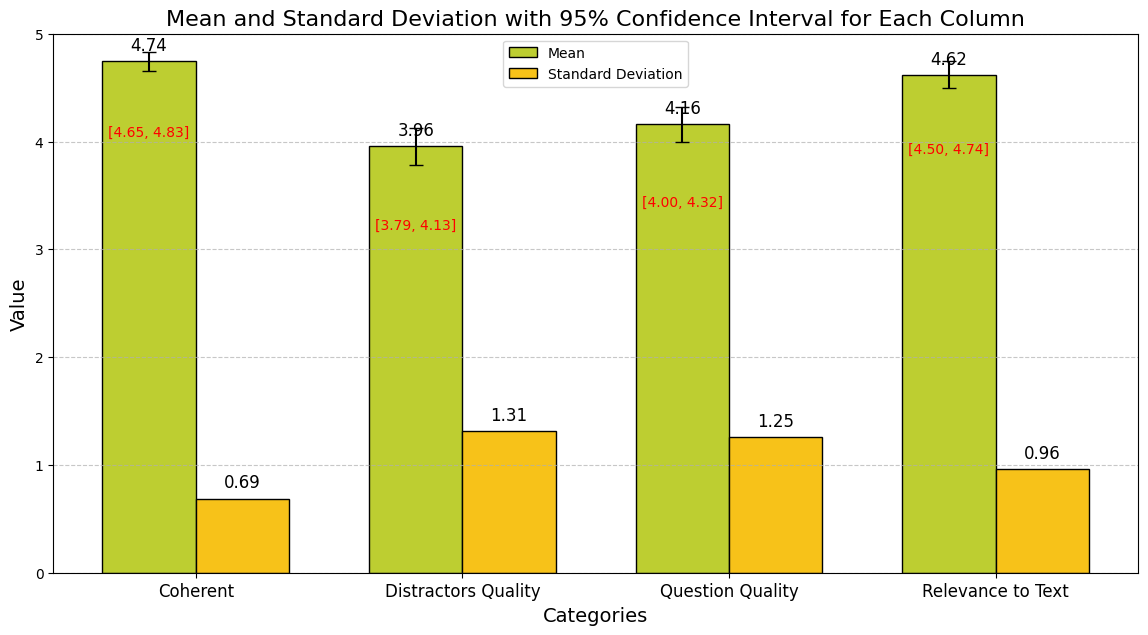

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming mean_df and column_std are pandas Series with the same index
# Create a DataFrame for easier plotting
df_MSD = pd.DataFrame({
    'Mean': mean_df,
    'Standard Deviation': column_std
})

# Sample size (number of observations)
n = len(combined_df)

# Confidence level (e.g., 95%)
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z * (df_MSD['Standard Deviation'] / np.sqrt(n))

# Calculate confidence intervals (lower and upper bounds)
ci_lower = df_MSD['Mean'] - margin_of_error
ci_upper = df_MSD['Mean'] + margin_of_error

# Set up the plot
plt.figure(figsize=(14, 7))  # Increase figure size for more space

# Define the width of the bars and their positions
bar_width = 0.35
index = np.arange(len(df_MSD))

# Plot the bars for Mean with error bars for confidence intervals
bars_mean = plt.bar(index, df_MSD['Mean'], bar_width, yerr=margin_of_error, capsize=5, label='Mean', color='#BDCE31', edgecolor='black')
bars_std = plt.bar(index + bar_width, df_MSD['Standard Deviation'], bar_width, label='Standard Deviation', color='#F7C219', edgecolor='black')

# Set y-axis range
plt.ylim(0, 5)

# Add labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Mean and Standard Deviation with 95% Confidence Interval for Each Column', fontsize=16)

# Set x-axis labels and make them horizontal
plt.xticks(index + bar_width / 2, df_MSD.index, rotation=0, fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display mean value and confidence intervals on top of each mean bar
for bar, lower, upper in zip(bars_mean, ci_lower, ci_upper):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.2f}', ha='center', fontsize=12)
    plt.text(bar.get_x() + bar.get_width() / 2, lower - 0.6,  # Move CI text lower
             f'[{lower:.2f}, {upper:.2f}]', ha='center', fontsize=10, color='red')

# Display standard deviation value on top of each std bar
for bar in bars_std:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

# Add a legend
plt.legend()

plt.savefig('Mean_SD_IC_plot.png', bbox_inches='tight')
# Show the plot
plt.show()



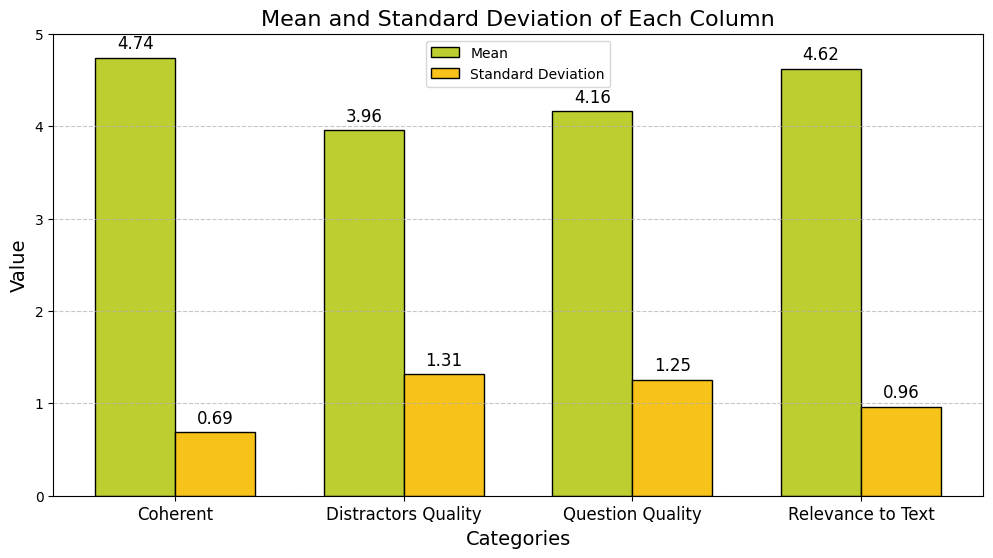

In [ ]:
# Assuming mean_df and column_std are pandas Series with the same index
# Create a DataFrame for easier plotting
df_MSD = pd.DataFrame({
    'Mean': mean_df,
    'Standard Deviation': column_std
})

# Set up the plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability

# Define the width of the bars and their positions
bar_width = 0.35
index = np.arange(len(df_MSD))

# Plot the bars for Mean and Standard Deviation
bars_mean = plt.bar(index, df_MSD['Mean'], bar_width, label='Mean', color='#BDCE31', edgecolor='black')
bars_std = plt.bar(index + bar_width, df_MSD['Standard Deviation'], bar_width, label='Standard Deviation', color='#F7C219', edgecolor='black')

# Set y-axis range
plt.ylim(0, 5)

# Add labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Mean and Standard Deviation of Each Column', fontsize=16)

# Set x-axis labels and make them horizontal
plt.xticks(index + bar_width / 2, df_MSD.index, rotation=0, fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display value labels on top of each bar
for bar in bars_mean:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.2f}', ha='center', fontsize=12)
for bar in bars_std:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

# Add a legend
plt.legend()

plt.savefig('Mean_SD_plot.png', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
num_of_correct = combined_df["Correct Answer"].value_counts()

In [ ]:
num_of_correct

,count
Correct Answer,
1,218
0,11


In [ ]:
total = num_of_correct[1]+num_of_correct[0]
correct = num_of_correct[1] / total
incorrect = num_of_correct[0] / total

print(total, correct , incorrect)

229 0.9519650655021834 0.048034934497816595


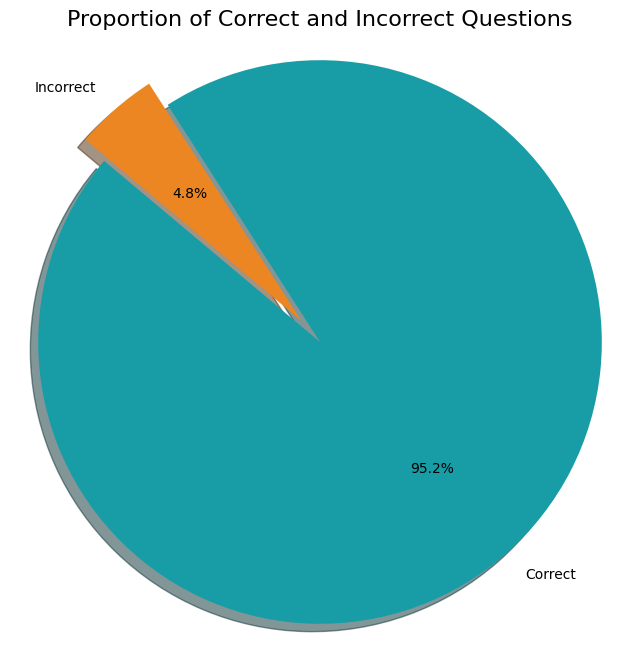

In [ ]:
# Data for pie chart
labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]


colors = [ '#189DA7','#EC8622']
explode = (0.1, 0)  # explode the correct section slightly

# Set up the plot
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Add title
plt.title('Proportion of Correct and Incorrect Questions', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')


plt.savefig('Accuracy_of_question.png', bbox_inches='tight')
# Show the plot
plt.show()